<a href="https://colab.research.google.com/github/guten-morgen3776/NeurIPS---Open-Polymer-Prediction-2025/blob/main/%E3%83%9D%E3%83%AA%E3%83%9E%E3%83%BCEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [70]:
!pip install missingno

In [71]:
!pip install rdkit

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from rdkit import Chem
from rdkit.Chem import Draw, rdDepictor
from rdkit.Chem import Descriptors
from IPython.display import display
rdDepictor.SetPreferCoordGen(True)

In [73]:
train_data = pd.read_csv('/content/drive/MyDrive/neurips-open-polymer-prediction-2025/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/neurips-open-polymer-prediction-2025/test.csv')

In [74]:
train_data.head(3)

,id,SMILES,Tg,FFV,Tc,Density,Rg
0,87817,*CC(*)c1ccccc1C(=O)OCCCCCC,NaN,0.374645,0.205667,NaN,NaN
1,106919,*Nc1ccc([C@H](CCC)c2ccc(C3(c4ccc([C@@H](CCC)c5...,NaN,0.370410,NaN,NaN,NaN
2,388772,*Oc1ccc(S(=O)(=O)c2ccc(Oc3ccc(C4(c5ccc(Oc6ccc(...,NaN,0.378860,NaN,NaN,NaN


In [75]:
test_data.head(3)

,id,SMILES
0,1109053969,*Oc1ccc(C=NN=Cc2ccc(Oc3ccc(C(c4ccc(*)cc4)(C(F)...
1,1422188626,*Oc1ccc(C(C)(C)c2ccc(Oc3ccc(C(=O)c4cccc(C(=O)c...
2,2032016830,*c1cccc(OCCCCCCCCOc2cccc(N3C(=O)c4ccc(-c5cccc6...


In [76]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7973 entries, 0 to 7972
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       7973 non-null   int64  
 1   SMILES   7973 non-null   object 
 2   Tg       511 non-null    float64
 3   FFV      7030 non-null   float64
 4   Tc       737 non-null    float64
 5   Density  613 non-null    float64
 6   Rg       614 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 436.2+ KB


In [77]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      3 non-null      int64 
 1   SMILES  3 non-null      object
dtypes: int64(1), object(1)
memory usage: 180.0+ bytes


In [78]:
train_data.describe()

,id,Tg,FFV,Tc,Density,Rg
count,7.973000e+03,511.000000,7030.000000,737.000000,613.000000,614.000000
mean,1.080050e+09,96.452314,0.367212,0.256334,0.985484,16.419787
std,6.218241e+08,111.228279,0.029609,0.089538,0.146189,4.608640
min,8.781700e+04,-148.029738,0.226992,0.046500,0.748691,9.728355
25%,5.376641e+08,13.674509,0.349549,0.186000,0.890243,12.540328
50%,1.079079e+09,74.040183,0.364264,0.236000,0.948193,15.052194
75%,1.621708e+09,161.147595,0.380790,0.330500,1.062096,20.411067
max,2.147438e+09,472.250000,0.777097,0.524000,1.840999,34.672906


<Figure size 1000x400 with 0 Axes>

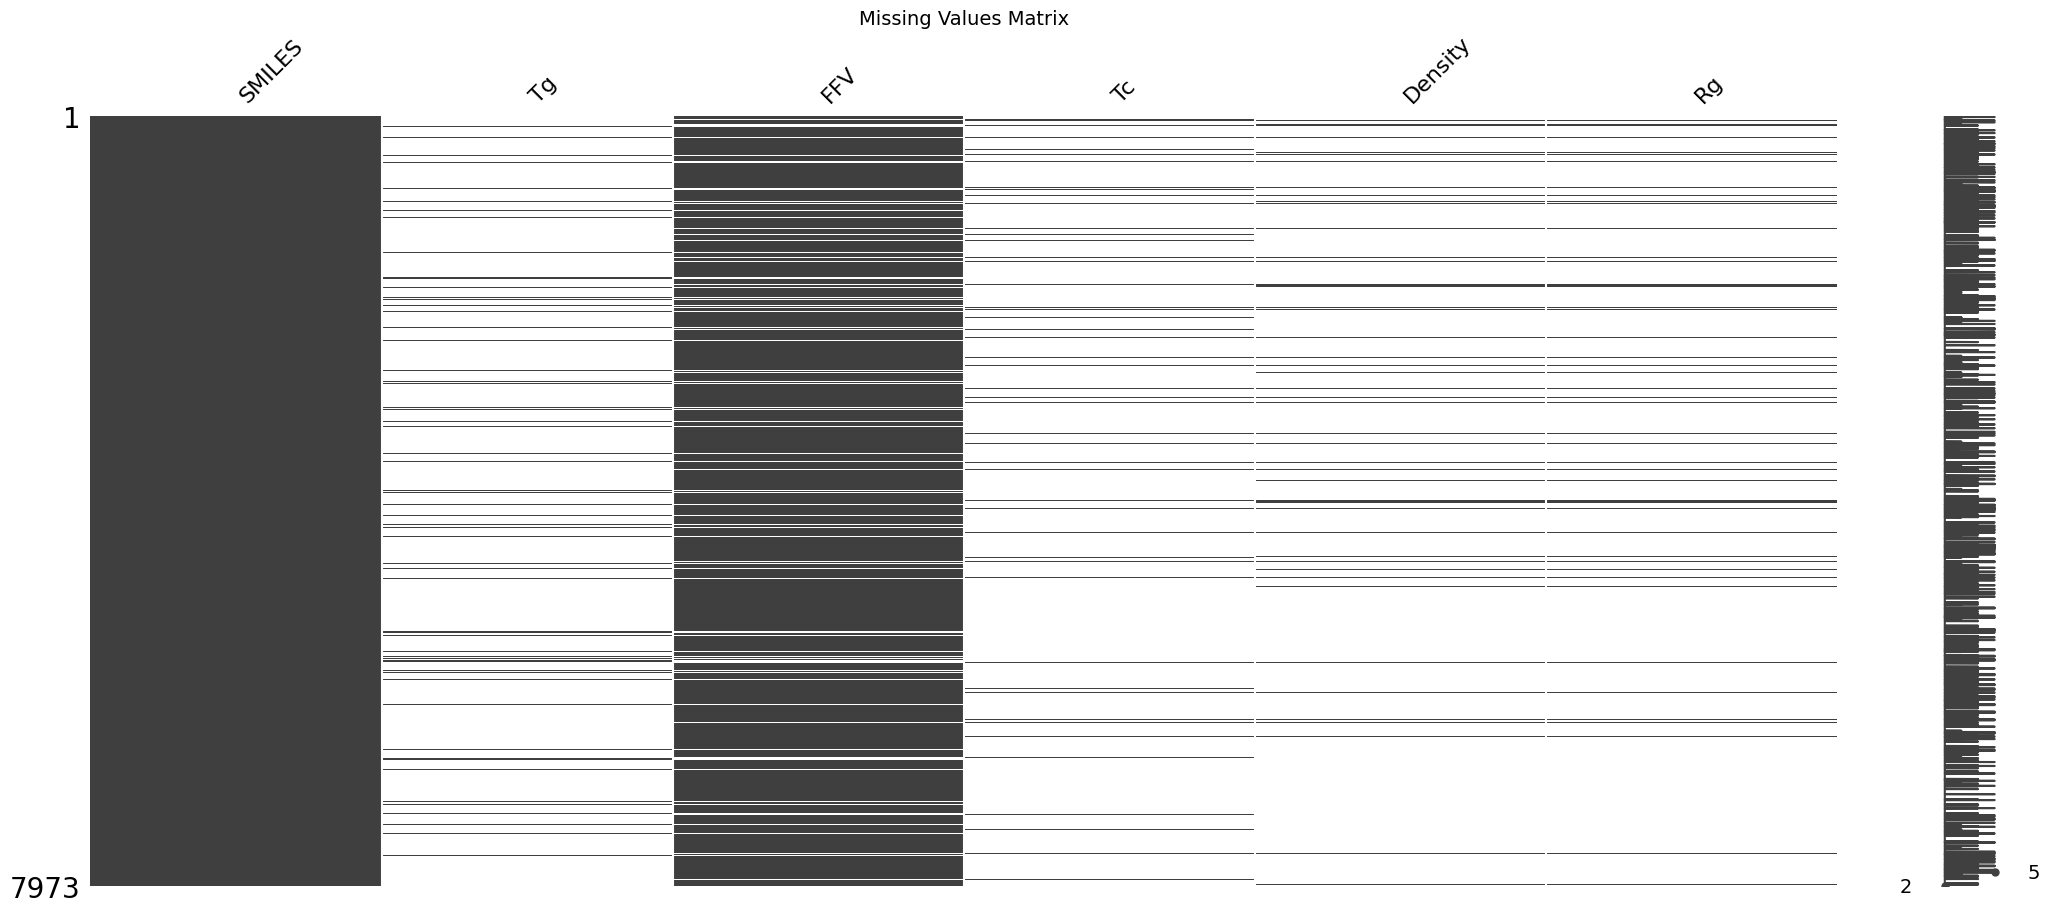

In [79]:
def missing(df):
    plt.figure(figsize=(10, 4))
    msno.matrix(df.drop('id', axis=1))
    plt.title('Missing Values Matrix', fontsize=14)
    plt.show()

missing(df=train_data)

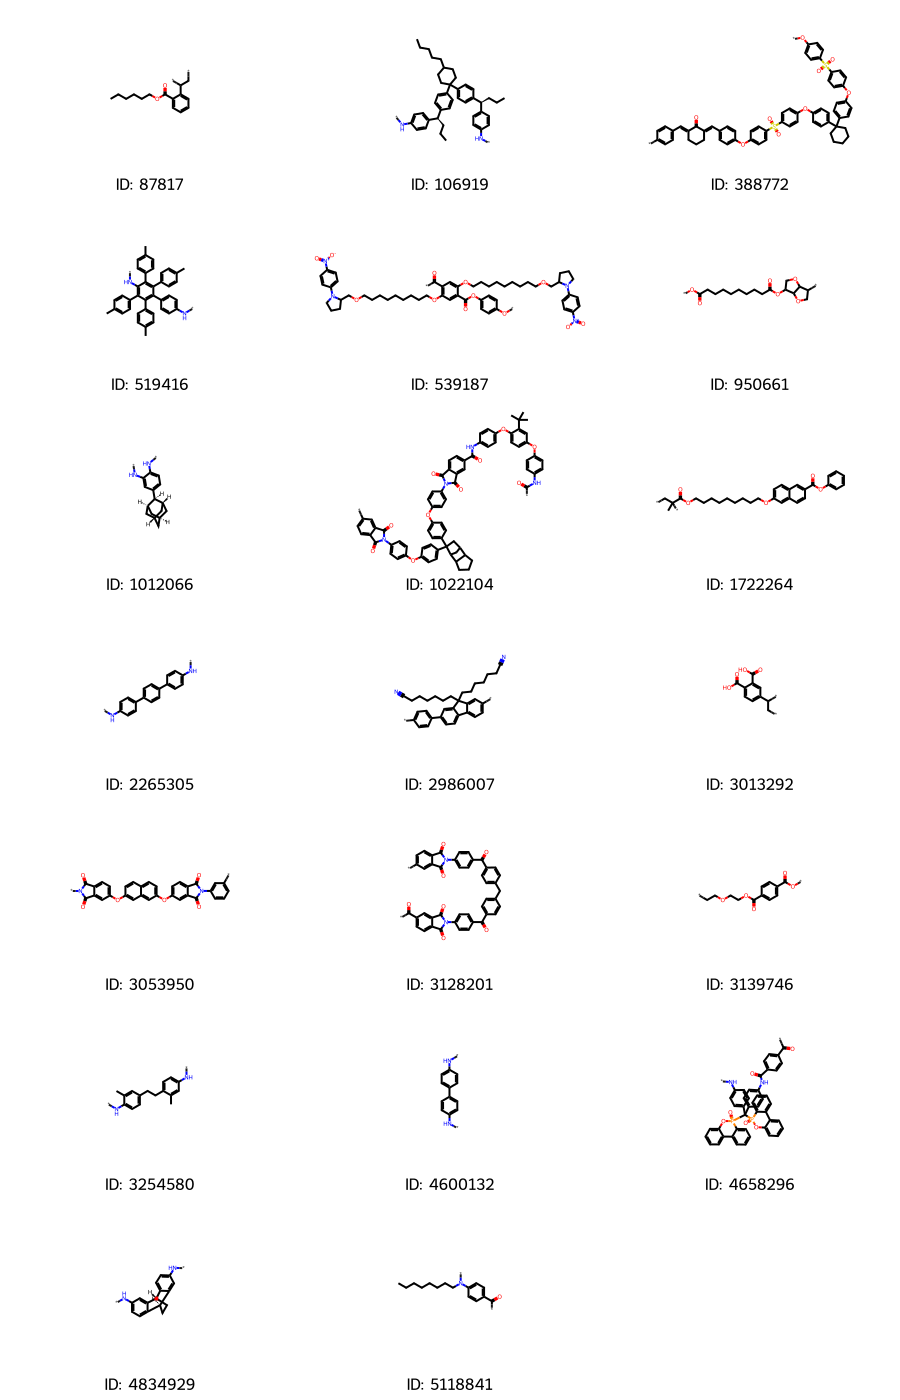

In [80]:
def plot_molecule_examples(df, n=20):
    mols = []
    legends = []

    for i, row in df.head(n).iterrows():
        m = Chem.MolFromSmiles(row['SMILES'])
        if m:
            mols.append(m)
            legends.append(f"ID: {row['id']}")

    img = Draw.MolsToGridImage(
        mols, legends=legends, molsPerRow=3, subImgSize=(300, 200)
    )
    display(img)
plot_molecule_examples(train_data)

In [81]:
num_cols = ['Tg','FFV','Tc','Density','Rg']

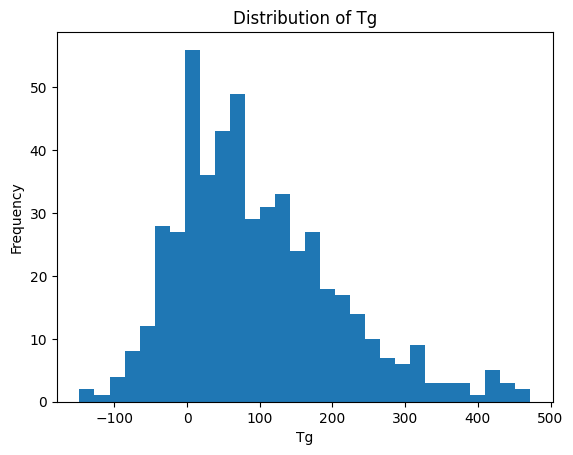

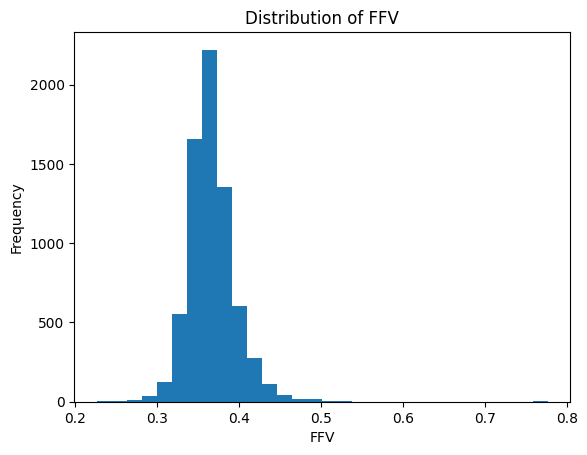

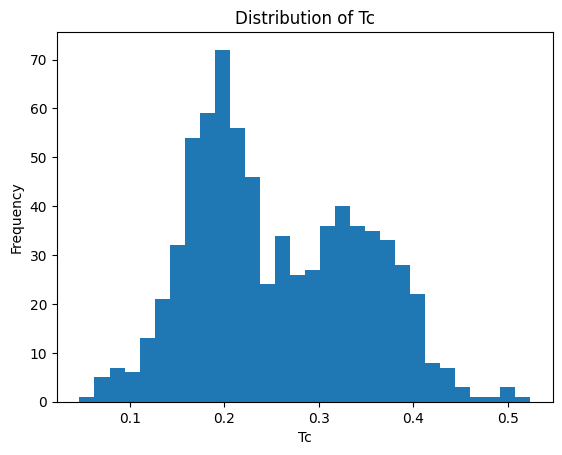

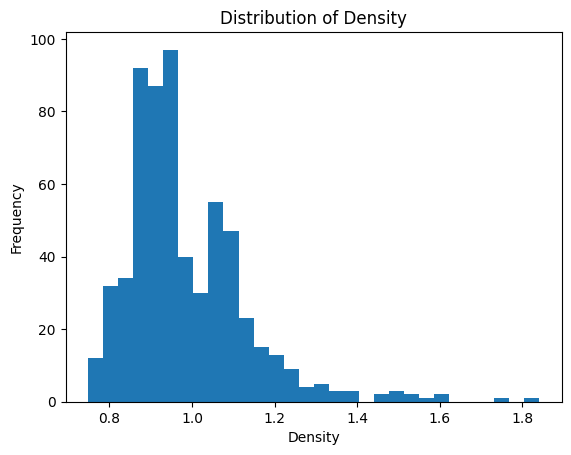

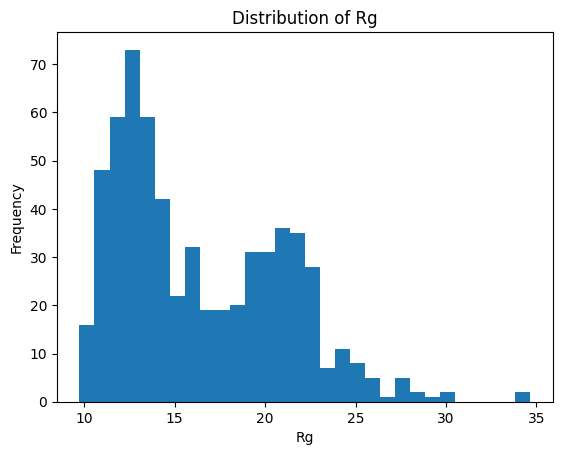

In [82]:
for col in num_cols:
  plt.hist(train_data[col], bins=30)
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()

In [83]:
def compute_all_descriptors(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return [None] * len(desc_names)
    return [desc[1](mol) for desc in Descriptors.descList]

desc_names = [desc[0] for desc in Descriptors.descList]
descriptors = train_data['SMILES'].apply(compute_all_descriptors)
descriptors = pd.DataFrame(descriptors.tolist(), columns=desc_names)

train_data = pd.concat([train_data,descriptors],axis=1)

In [84]:
train_data.head(3)

,id,SMILES,Tg,FFV,Tc,Density,Rg,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,87817,*CC(*)c1ccccc1C(=O)OCCCCCC,NaN,0.374645,0.205667,NaN,NaN,12.144536,12.144536,0.105927,...,0,0,0,0,0,0,0,0,3,0
1,106919,*Nc1ccc([C@H](CCC)c2ccc(C3(c4ccc([C@@H](CCC)c5...,NaN,0.370410,NaN,NaN,NaN,3.523412,3.523412,0.098918,...,0,0,0,0,0,0,0,0,2,0
2,388772,*Oc1ccc(S(=O)(=O)c2ccc(Oc3ccc(C4(c5ccc(Oc6ccc(...,NaN,0.378860,NaN,NaN,NaN,13.714745,13.714745,0.107441,...,0,0,2,0,0,0,0,0,0,0
